# Contents
## 0) Import Modules & Data
## 1) Establish Goals
## 2) Label Points of Seismic Activity in US
### _- A) Seismic Activity on World Map_
### _- B) Seismic Activity in US_
## 3) Choropleth Map
### _- A) sJoin 'seis_gdf' to 'states'_
### _- B) Data Cleaning / Consistency Checks_
### _- C) Plot Choropleth Map_
### _- D) Add Legend_
## 4) Conclusion

# 0) Import Modules & Data

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import geopandas as gpd
import geoplot

In [12]:
# Import latest seismic data

seis=pd.read_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/2021-07-24 - cluster_df.csv')

In [13]:
# Import US state shapefile

states=gpd.read_file('/Users/sjpeterson76/Desktop/MY DATA/Shapefiles/USA State Shapefile/USA_States.shp')

In [14]:
seis.columns

Index(['Unnamed: 0', 'date', 'time', 'lat', 'long', 'type', 'depth', 'mag',
       'mag_type', 'rms', 'id', 'source', 'status', 'reg_flag', 'clust_color'],
      dtype='object')

In [15]:
## Remove columns from seis
# Assign benign columns to list

del_cols=['Unnamed: 0',
         'rms',
         'source',
         'status',
         'mag_type']

In [16]:
seis=seis.drop(columns=del_cols) # Drop del_cols

In [17]:
seis.columns

Index(['date', 'time', 'lat', 'long', 'type', 'depth', 'mag', 'id', 'reg_flag',
       'clust_color'],
      dtype='object')

# 1) Establish Goals
## - Categorize and label points by color in US.
## - Using a choropleth, find out which states in US have had the most shake-ups: earthquakes, explosions, nuclear explosions, rock bursts. 
## - Find out which US states have endured the highest magnitude of seismic activity.

# 2) Label Points of Seismic Activity in US

In [18]:
# Convert df into gdf

seis_gdf = gpd.GeoDataFrame(seis,geometry=gpd.points_from_xy(seis['long'], seis['lat']))

In [19]:
seis_gdf.head(5)

,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,geometry
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,reg_2,pink,POINT (145.61600 19.24600)
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,reg_2,pink,POINT (127.35200 1.86300)
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,reg_2,purple,POINT (-173.97200 -20.57900)
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,reg_1,purple,POINT (-23.55700 -59.07600)
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,reg_2,pink,POINT (126.42700 11.93800)


In [20]:
## Draw world map

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [21]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

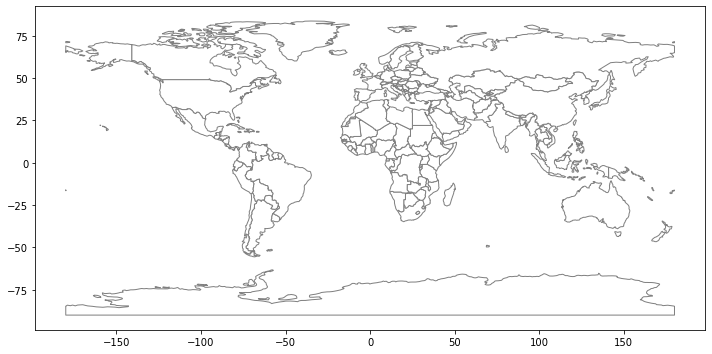

In [22]:
world.plot(color='white', edgecolor='grey', figsize=(12,8))

In [23]:
seis_gdf['clust_color'].unique()

array(['pink', 'purple', 'black'], dtype=object)

## _- A) Seismic Activity on World Map_

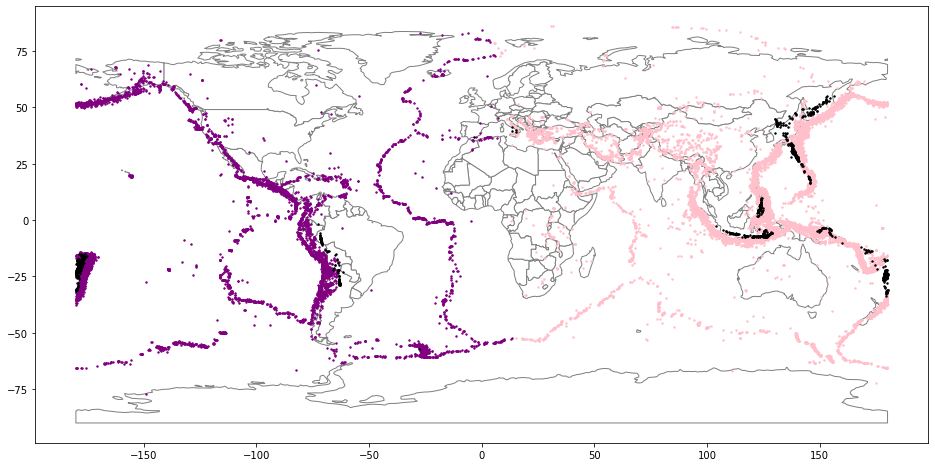

In [24]:
ax = world.plot(color='white', edgecolor='grey', figsize=(16,12))
seis_gdf[seis_gdf['clust_color']=='pink'].plot(ax=ax, color='pink', markersize=2)
seis_gdf[seis_gdf['clust_color']=='purple'].plot(ax=ax, color='purple', markersize=2)
seis_gdf[seis_gdf['clust_color']=='black'].plot(ax=ax, color='black', markersize=2)
plt.show()

In [25]:
seis_gdf.shape

(23399, 11)

In [26]:
## Zoom to just US
# Create a range and assign to 'usa': lat 75-22, long -170, -40

usa = seis_gdf[(seis_gdf['lat'] > 22) & (seis_gdf['lat'] < 75) & (seis_gdf['long'] < -60) & (seis_gdf['long'] > -170)]
usa = usa.reset_index(drop=True)

In [27]:
usa.head(5)

,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,geometry
0,02/06/1965,01:40:32,53.008,-162.008,Earthquake,17.8,6.4,ISCGEM859637,reg_3,purple,POINT (-162.00800 53.00800)
1,02/06/1965,16:50:29,53.191,-161.859,Earthquake,22.5,6.3,ISCGEM859712,reg_3,purple,POINT (-161.85900 53.19100)
2,02/27/1965,07:46:25,28.133,-112.208,Earthquake,10.0,6.0,ISCGEM860614,reg_3,purple,POINT (-112.20800 28.13300)
3,03/13/1965,07:33:24,53.292,-162.331,Earthquake,20.0,5.7,ISCGEM858558,reg_3,purple,POINT (-162.33100 53.29200)
4,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,POINT (-160.37500 64.57200)


In [73]:
# Convert gdf 'usa' into df usa_df

usa_df=pd.DataFrame(usa)

In [74]:
# Export 'usa_df'

usa_df.to_csv('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/san_andreas.csv')

In [28]:
# Create gdf that only contains seismic activities in US

usa_gdf = gpd.GeoDataFrame(usa,geometry=gpd.points_from_xy(usa['long'], usa['lat']))

In [29]:
usa_gdf.shape

(804, 11)

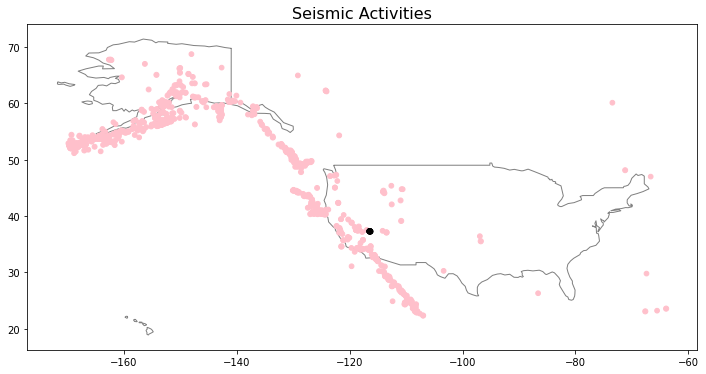

In [30]:
# Plot the map

ax = world[world['name'] == 'United States of America'].plot(color='white', 
                                                             edgecolor='gray', 
                                                             figsize=(12,8))
usa_gdf[usa_gdf['type']=='Earthquake'].plot(ax=ax, color='pink', markersize=usa_gdf['mag']*4)
usa_gdf[usa_gdf['type']=='Nuclear Explosion'].plot(ax=ax, color='black', markersize=usa_gdf['mag']*4)
plt.title("Seismic Activities", fontsize=16)
plt.show()

In [31]:
## Filter out points that don't fit within US gdf
# Create gdf for poi

us_filter=world[world.name == "United States of America"]

In [32]:
us_filter.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [33]:
us_filter=us_filter[['name','geometry']] # US Shapefile (w/o states)

In [34]:
us_filter.shape

(1, 2)

In [35]:
usa_gdf.shape # Check 'before' shape

(804, 11)

In [36]:
from geopandas.tools import sjoin # Import module to join gpd's

In [37]:
## Limit gdf to only points within US boundaries
# Join 'gdf' seismic data & 'us_filter' US Shapefile (w/o states)

strict_us_gdf = sjoin(usa_gdf,us_filter,how='right')
strict_us_gdf.head(5)

<ipython-input-37-6eaad1af1862>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  strict_us_gdf = sjoin(usa_gdf,us_filter,how='right')


,index_left,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,name,geometry
4,4,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,7,04/29/1965,15:28:45,47.288,-122.406,Earthquake,64.7,6.7,ISCGEM858143,reg_3,purple,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,11,06/27/1965,11:08:59,60.281,-141.418,Earthquake,15.0,6.5,ISCGEM856449,reg_3,purple,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,23,04/16/1966,01:27:14,56.896,-153.601,Earthquake,15.0,6.2,ISCGEM848441,reg_3,purple,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4,29,08/16/1966,18:02:36,37.380,-114.157,Earthquake,10.0,5.7,ISCGEM844550,reg_3,purple,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
strict_us_gdf.shape

(222, 13)

In [39]:
strict_us_gdf.columns

Index(['index_left', 'date', 'time', 'lat', 'long', 'type', 'depth', 'mag',
       'id', 'reg_flag', 'clust_color', 'name', 'geometry'],
      dtype='object')

In [40]:
## Drop 'index_left','name' & 'geometry' columns

del_cols=['index_left',
          'name',
          'geometry']

In [41]:
# Perform .drop()

strict_us_gdf.drop(columns=del_cols,
                  inplace=True)

In [42]:
strict_us_gdf.columns

Index(['date', 'time', 'lat', 'long', 'type', 'depth', 'mag', 'id', 'reg_flag',
       'clust_color'],
      dtype='object')

In [43]:
usa_gdf.head(5)

,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,geometry
0,02/06/1965,01:40:32,53.008,-162.008,Earthquake,17.8,6.4,ISCGEM859637,reg_3,purple,POINT (-162.00800 53.00800)
1,02/06/1965,16:50:29,53.191,-161.859,Earthquake,22.5,6.3,ISCGEM859712,reg_3,purple,POINT (-161.85900 53.19100)
2,02/27/1965,07:46:25,28.133,-112.208,Earthquake,10.0,6.0,ISCGEM860614,reg_3,purple,POINT (-112.20800 28.13300)
3,03/13/1965,07:33:24,53.292,-162.331,Earthquake,20.0,5.7,ISCGEM858558,reg_3,purple,POINT (-162.33100 53.29200)
4,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,POINT (-160.37500 64.57200)


In [44]:
## Merge with older gdf. Only import the geometry column!
# Create subset with just 'id' & 'geometry'

usa_gdf_sub=usa_gdf[['id',
                    'geometry']]

In [45]:
usa_gdf_sub.shape

(804, 2)

In [46]:
strict_us_gdf.shape

(222, 10)

In [47]:
# Left merge 'strict_us_gdf' with new gdf

strict_us_gdf_merge=strict_us_gdf.merge(usa_gdf_sub,
                                        on=['id'],
                                       indicator=False)

In [48]:
strict_us_gdf_merge.head(5) # Check columns

,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,geometry
0,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,POINT (-160.37500 64.57200)
1,04/29/1965,15:28:45,47.288,-122.406,Earthquake,64.7,6.7,ISCGEM858143,reg_3,purple,POINT (-122.40600 47.28800)
2,06/27/1965,11:08:59,60.281,-141.418,Earthquake,15.0,6.5,ISCGEM856449,reg_3,purple,POINT (-141.41800 60.28100)
3,04/16/1966,01:27:14,56.896,-153.601,Earthquake,15.0,6.2,ISCGEM848441,reg_3,purple,POINT (-153.60100 56.89600)
4,08/16/1966,18:02:36,37.380,-114.157,Earthquake,10.0,5.7,ISCGEM844550,reg_3,purple,POINT (-114.15700 37.38000)


In [49]:
# Check shape

strict_us_gdf_merge.shape

(222, 11)

## _- B) Seismic Activity in US_

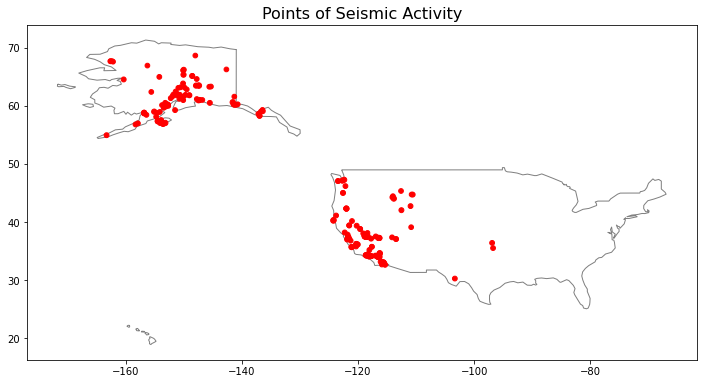

In [50]:
# Plot 'us_gdf' to check points

ax=us_filter.plot(color='white',
                  edgecolor='gray',
                  figsize=(12,8))
strict_us_gdf_merge.plot(ax=ax,
            color='red',
            markersize=strict_us_gdf_merge['mag']*4)
plt.title('Points of Seismic Activity',fontsize=16)
plt.show()

In [51]:
type(strict_us_gdf_merge)

geopandas.geodataframe.GeoDataFrame

# 3) Choropleth Map

In [52]:
states.head(5) # Check out 'states'

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [53]:
seis_gdf.shape

(23399, 11)

## _- A) sJoin 'seis_gdf' to 'states'_

In [54]:
seis_states=sjoin(seis_gdf,states,how='right')
seis_states.head(5)

<ipython-input-54-d809c7db7aaa>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  seis_states=sjoin(seis_gdf,states,how='right')


,index_left,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
50,122.0,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
50,186.0,06/27/1965,11:08:59,60.281,-141.418,Earthquake,15.0,6.5,ISCGEM856449,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
50,249.0,09/04/1965,14:32:51,58.090,-152.525,Earthquake,27.8,7.0,ISCGEM853605,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
50,250.0,09/08/1965,03:26:22,57.513,-152.263,Earthquake,25.0,5.7,ISCGEM853683,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
50,530.0,10/07/1966,20:55:57,61.580,-150.126,Earthquake,55.0,5.6,ISCGEMSUP842271,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


## _- B) Data Cleaning / Consistency Checks_

In [55]:
# Reset index
seis_states.reset_index(inplace=True)
seis_states.head(5)

,index,index_left,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,50,122.0,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
1,50,186.0,06/27/1965,11:08:59,60.281,-141.418,Earthquake,15.0,6.5,ISCGEM856449,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,50,249.0,09/04/1965,14:32:51,58.090,-152.525,Earthquake,27.8,7.0,ISCGEM853605,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
3,50,250.0,09/08/1965,03:26:22,57.513,-152.263,Earthquake,25.0,5.7,ISCGEM853683,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
4,50,530.0,10/07/1966,20:55:57,61.580,-150.126,Earthquake,55.0,5.6,ISCGEMSUP842271,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


In [56]:
# Drop columns 'index' & 'index_left'

seis_states.drop(columns=['index',
                         'index_left'],
                inplace=True)
seis_states.head(2)

,date,time,lat,long,type,depth,mag,id,reg_flag,clust_color,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,6.0,ISCGEM857809,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
1,06/27/1965,11:08:59,60.281,-141.418,Earthquake,15.0,6.5,ISCGEM856449,reg_3,purple,Alaska,02,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


In [57]:
seis_states.isnull().sum() # Find nulls

date           39
time           39
lat            39
long           39
type           39
depth          39
mag            39
id             39
reg_flag       39
clust_color    39
STATE_NAME      0
STATE_FIPS      0
STATE_ABBR      0
geometry        0
dtype: int64

In [58]:
seis_states_clean=seis_states[seis_states['date'].isnull()==False]

In [59]:
seis_states_clean.isnull().sum() # Check nulls

date           0
time           0
lat            0
long           0
type           0
depth          0
mag            0
id             0
reg_flag       0
clust_color    0
STATE_NAME     0
STATE_FIPS     0
STATE_ABBR     0
geometry       0
dtype: int64

In [60]:
seis_states_clean.columns

Index(['date', 'time', 'lat', 'long', 'type', 'depth', 'mag', 'id', 'reg_flag',
       'clust_color', 'STATE_NAME', 'STATE_FIPS', 'STATE_ABBR', 'geometry'],
      dtype='object')

In [61]:
# Rename columns w/ snake_case

rename={'STATE_NAME':'st_name', 
        'STATE_FIPS':'st_fips', 
        'STATE_ABBR':'st_abbr'}

In [62]:
seis_states_clean.rename(columns=rename,
                        inplace=True)

/Users/sjpeterson76/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [63]:
seis_states_clean.columns

Index(['date', 'time', 'lat', 'long', 'type', 'depth', 'mag', 'id', 'reg_flag',
       'clust_color', 'st_name', 'st_fips', 'st_abbr', 'geometry'],
      dtype='object')

In [64]:
# out = r"C:/Users/asus/Documents/Career Foundry/Achievement 6/6.3 Images & Assets/Data/Calories.shp"
# usa_edit.to_file(out)

In [65]:
# Export gdf

seis_states_clean.to_file('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/us_states_choropleth_gdf.shp')

<ipython-input-65-28b01bf568ef>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  seis_states_clean.to_file('/Users/sjpeterson76/Desktop/CareerFoundry/Data Immersion/Achievement 6/Seismic Data Project/02 Data/Prepared Data/us_states_choropleth_gdf.shp')


## _- C) Plot Choropleth Map_

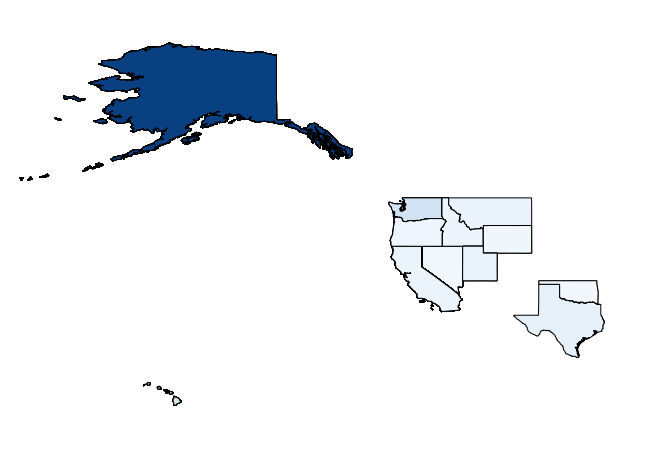

In [66]:
seis_cm=geoplot.choropleth(seis_states_clean,
                          hue=seis_states_clean['depth'],
                          scheme=None,
                          cmap='Blues',
                          figsize=(12,8)
                          )

## _- D) Add Legend_

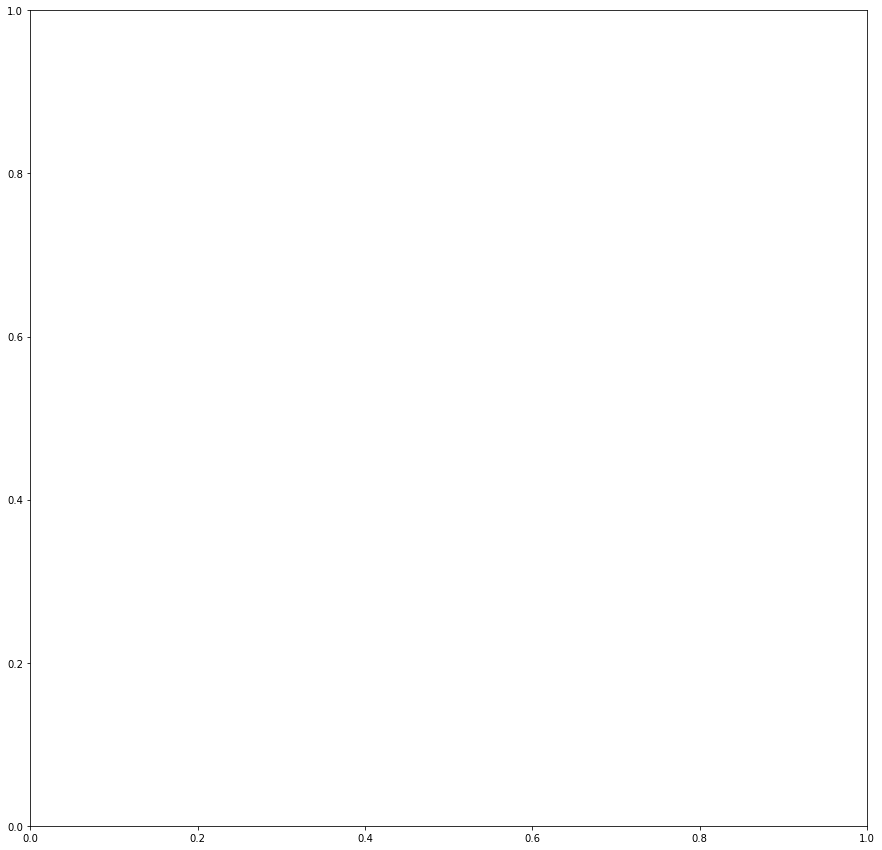

In [67]:
# Create a subplot with `fig` and `ax`.
fig,ax=plt.subplots(1,figsize=(15, 15))

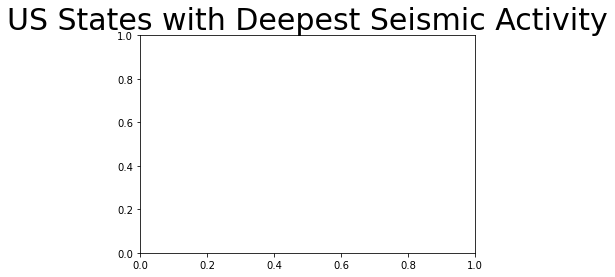

In [68]:
plt.title('US States with Deepest Seismic Activity', size=30)
tl=seis_states_clean.plot(column='depth',
                 cmap='Blues',
                 linewidth=0.6,
                 ax=ax,
                 edgecolor='black');

In [69]:
c_bar_colors=plt.cm.ScalarMappable(cmap='Blues',
                                   norm=plt.Normalize(vmin=seis_states_clean['depth'].min(),
                                                      vmax=seis_states_clean['depth'].max()))

# Plot the colorbar.
color_bar=fig.colorbar(c_bar_colors)

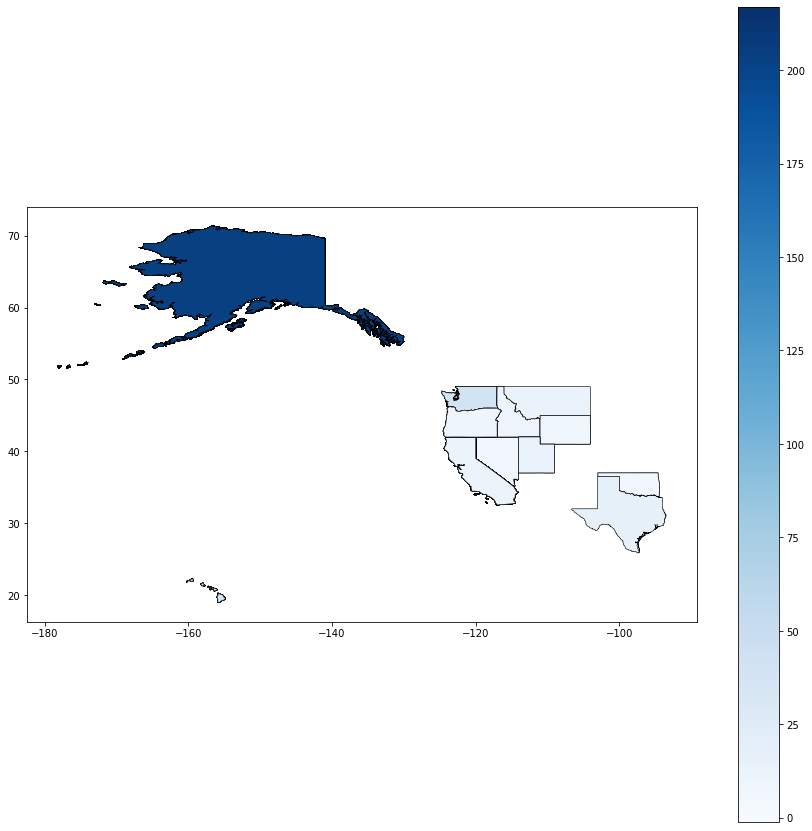

In [70]:
tl.figure

# 4) Conclusion

- The problem with my data is that it is difficult to analyze it using conventional structures like states or countries. The datapoints lay across faultlines, which can't be contained that way. The choropleth map analysis doesn't give me much that I didn't already know.
- Although fruitless, this analysis has inpsired my curiosity. It would be interesting to create a timelapse map of low-magnitude deep earthquakes and see if they lead to shallow but powerful quakes later.